# Tablas e imágenes

In [ ]:
# Requerimientos
!pip install pandas sqlalchemy tabulate seaborn

In [92]:
import pandas as pd
import sqlalchemy

db = sqlalchemy.create_engine("sqlite:///data-1320.sqlite")
df = pd.read_sql("select * from data where year >=2015 and year <= 2019", db)
df.columns

Index(['Source', 'Country', 'Ticker', 'Name', 'Year', 'Sector', 'Industry',
       'Revenue', 'Income', 'Assets', 'Equity', 'Profit', 'Turnover',
       'Leverage', 'ROE', 'ROA'],
      dtype='object')

## Tabla 1

In [85]:
t1 = df.groupby("Country")["Source"].nunique().sort_values(ascending=False).reset_index()
t1["Porcentaje"] = t1["Source"] / t1["Source"].sum() * 100
t1.loc["Total"] = t1.sum(numeric_only=True, axis=0)

t1 = t1.fillna("").round(decimals=2).rename(columns={"Country": "País", "Source": "Empresas"})
print(t1.to_markdown(index=False))

| País     |   Empresas |   Porcentaje |
|:---------|-----------:|-------------:|
| Mexico   |        141 |        40.63 |
| Chile    |        107 |        30.84 |
| Peru     |         52 |        14.99 |
| Colombia |         47 |        13.54 |
|          |        347 |       100    |


## Tabla 2

In [90]:
t2 = df.groupby("Country")[["Profit", "Turnover", "Leverage", "ROE", "ROA"]].mean().mul(100).sort_values("ROE", ascending=False).reset_index()
t2 = t2.rename(columns={"Country": "País", "Profit": "Beneficio", "Turnover": "Rotación", "Leverage": "Multiplicador"})
print(t2.to_markdown(index=False, floatfmt='.2f'))

| País     |   Beneficio |   Rotación |   Multiplicador |   ROE |   ROA |
|:---------|------------:|-----------:|----------------:|------:|------:|
| Peru     |     -136.02 |      49.54 |          316.53 | 10.00 |  4.40 |
| Chile    |     3084.90 |      48.25 |          301.24 |  9.69 |  3.72 |
| Colombia |       28.62 |      43.94 |          401.34 |  7.94 |  2.77 |
| Mexico   |     -540.75 |      53.54 |          425.89 |  4.15 |  3.77 |


## Figure 2

<Axes: >

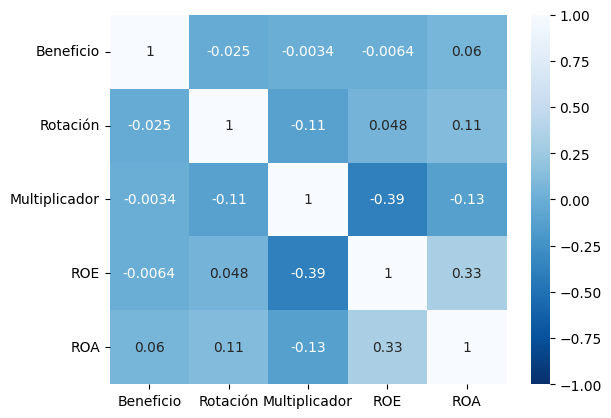

In [109]:
import seaborn as sns

t3 = df[["Profit", "Turnover", "Leverage", "ROE", "ROA"]]
t3 = t3.rename(columns={"Country": "País", "Profit": "Beneficio", "Turnover": "Rotación", "Leverage": "Multiplicador"})
t3 = t3.corr(method="pearson")
f1 = sns.heatmap(t3, cmap="Blues_r", annot=True, vmin=-1, vmax=1)
f1.get_figure().savefig("images/a_corr_mila.png")
f1